**Modes:** It has 3 modes
*   train
*   Validation
*   Predict

**Task:**
*   Detect
*   Segment
*   Classify

**Data:**
Format can be differ for task type, supports data.yaml,
data_folder, data_name



In [ ]:
!nvidia-smi

Thu Jun 20 04:37:46 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

In [ ]:
!pip show ultralytics

In [ ]:
import torch
torch.__version__

In [ ]:
from IPython import display
display.clear_output()

In [ ]:
import ultralytics
ultralytics.checks()

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

## Import Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/final_detection2

/content/drive/MyDrive/final_detection2


In [ ]:
!ls

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


## Train Model

In [ ]:
!yolo detect mode=train model=yolov8l.pt data=data.yaml epochs=100 imgsz=640 plots=True

100% 83.7M/83.7M [00:00<00:00, 239MB/s]
Ultralytics YOLOv8.2.36 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tru

In [ ]:
!scp -r  '/content/drive/MyDrive/final_detection2/runs  '

usage: scp [-346ABCOpqRrsTv] [-c cipher] [-D sftp_server_path] [-F ssh_config]
           [-i identity_file] [-J destination] [-l limit]
           [-o ssh_option] [-P port] [-S program] source ... target


## Validate

In [ ]:
!yolo detect mode=val  model=/content/drive/MyDrive/final_detection2/runs/detect/train/weights/best.pt data=data.yaml epochs=50 imgsz=640 plots=True save_txt=True save_hybrid=True

Ultralytics YOLOv8.2.36 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/drive/MyDrive/final_detection2/valid/labels.cache... 57 images, 24 backgrounds, 0 corrupt: 100% 57/57 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:07<00:00,  1.91s/it]
                   all         57         92          1          1      0.995      0.995
Speed: 11.2ms preprocess, 36.8ms inference, 0.0ms loss, 20.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
model=YOLO('/content/drive/MyDrive/final_detection2/runs/detect/train/weights/best.pt')
metrics=model.val(save_hybrid=True)

Ultralytics YOLOv8.2.36 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs


val: Scanning /content/drive/MyDrive/final_detection2/valid/labels.cache... 57 images, 24 backgrounds, 0 corrupt: 100%|██████████| 57/57 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.22s/it]


                   all         57         92          1          1      0.995      0.995
Speed: 9.4ms preprocess, 46.2ms inference, 0.1ms loss, 15.3ms postprocess per image
Results saved to runs/detect/val2


## Detection

In [18]:
from ultralytics import YOLO

In [ ]:
!yolo detect mode=predict model=/content/drive/MyDrive/final_detection2/runs/detect/train/weights/best.pt data=data.yaml imgsz=640 source=/content/drive/MyDrive/Videos/rooftop3.mp4 plots=True save=True conf=0.5

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
video 1/1 (frame 1/1789) /content/drive/MyDrive/Videos/rooftop3.mp4: 640x384 1 solar-panel, 475.5ms
video 1/1 (frame 2/1789) /content/drive/MyDrive/Videos/rooftop3.mp4: 640x384 (no detections), 39.7ms
video 1/1 (frame 3/1789) /content/drive/MyDrive/Videos/rooftop3.mp4: 640x384 1 solar-panel, 39.6ms
video 1/1 (frame 4/1789) /content/drive/MyDrive/Videos/rooftop3.mp4: 640x384 1 solar-panel, 39.6ms
video 1/1 (frame 5/1789) /content/drive/MyDrive/Videos/rooftop3.mp4: 640x3

## Tracking YOLO


In [ ]:
!yolo detect mode=track model=/content/drive/MyDrive/final_detection2/runs/detect/train/weights/best.pt data=data.yaml epochs=50 imgsz=640 source=/content/drive/MyDrive/Videos/1102649449-preview.mp4 plots=True save_crop=True

Ultralytics YOLOv8.2.36 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

video 1/1 (frame 1/730) /content/drive/MyDrive/Videos/1102649449-preview.mp4: 384x640 4 solar-panels, 111.1ms
video 1/1 (frame 2/730) /content/drive/MyDrive/Videos/1102649449-preview.mp4: 384x640 4 solar-panels, 39.6ms
video 1/1 (frame 3/730) /content/drive/MyDrive/Videos/1102649449-preview.mp4: 384x640 5 solar-panels, 39.5ms
video 1/1 (frame 4/730) /content/drive/MyDrive/Videos/1102649449-preview.mp4: 384x640 6 solar-panels, 39.9ms
video 1/1 (frame 5/730) /content/drive/MyDrive/Videos/1102649449-preview.mp4: 384x640 6 solar-panels, 39.5ms
video 1/1 (frame 6/730) /content/drive/MyDrive/Videos/1102649449-preview.mp4: 384x640 6 solar-panels, 39.5ms
video 1/1 (frame 7/730) /content/drive/MyDrive/Videos/1102649449-preview.mp4: 384x640 6 solar-panels, 39.5ms
video 1/1 (frame 8/730) /content/drive/MyDrive/Videos/1102649449-p

In [ ]:
!yolo detect mode=track model=/content/drive/MyDrive/final_detection2/runs/detect/train/weights/best.pt data=data.yaml epochs=50 imgsz=640 source=/content/drive/MyDrive/Videos/solar_panel1.jpg plots=True save_crop=True iou=0.7 max_det=300

Ultralytics YOLOv8.2.36 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/Videos/solar_panel1.jpg: 288x640 20 solar-panels, 117.1ms
Speed: 2.9ms preprocess, 117.1ms inference, 969.1ms postprocess per image at shape (1, 3, 288, 640)
Results saved to runs/detect/track2
💡 Learn more at https://docs.ultralytics.com/modes/track


In [ ]:
!yolo detect mode=track model=/content/drive/MyDrive/final_detection2/runs/detect/train/weights/best.pt data=data.yaml epochs=50 imgsz=640 source=/content/drive/MyDrive/Videos/solar_panel5.jpg plots=True save_crop=True iou=0.7 max_det=300

Ultralytics YOLOv8.2.36 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/Videos/solar_panel5.jpg: 448x640 11 solar-panels, 147.0ms
Speed: 4.2ms preprocess, 147.0ms inference, 946.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/track3
💡 Learn more at https://docs.ultralytics.com/modes/track


In [ ]:
!yolo detect mode=track model=/content/drive/MyDrive/final_detection2/runs/detect/train/weights/best.pt data=data.yaml epochs=50 imgsz=640 source=/content/drive/MyDrive/Videos/building_rooftop1.mp4 plots=True save_crop=True iou=0.7 max_det=300

Ultralytics YOLOv8.2.36 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
video 1/1 (frame 1/983) /content/drive/MyDrive/Videos/building_rooftop1.mp4: 640x384 3 solar-panels, 151.9ms
video 1/1 (frame 2/983) /content/drive/MyDrive/Videos/building_rooftop1.mp4: 640x384 3 solar-panels, 39.6ms
video 1/1 (frame 3/983) /content/drive/MyDrive/Videos/building_rooftop1.mp4: 640x384 3 solar-panels, 40.2ms
video 1/1 (frame 4/983) /content/drive/MyDrive/Videos/building_rooftop1.mp4: 640x384 3 solar-panels, 39.6ms
video 1/1 (frame 5/983) /content/drive/M

In [ ]:
!yolo detect mode=track model=/content/drive/MyDrive/Final_detection/runs/detect/train/weights/best.pt data=data.yaml epochs=50 imgsz=640 source=/content/drive/MyDrive/video/vecteezy_gorgeous-aerial-view-of-luton-town_16676803.mp4 plots=True project=/content/drive/MyDrive/Final_detection/runs/results name=track


Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs

video 1/1 (frame 1/1789) /content/drive/MyDrive/video/vecteezy_gorgeous-aerial-view-of-luton-town_16676803.mp4: 640x384 3 solar-panels, 2850.8ms
video 1/1 (frame 2/1789) /content/drive/MyDrive/video/vecteezy_gorgeous-aerial-view-of-luton-town_16676803.mp4: 640x384 4 solar-panels, 2625.1ms
video 1/1 (frame 3/1789) /content/drive/MyDrive/video/vecteezy_gorgeous-aerial-view-of-luton-town_16676803.mp4: 640x384 3 solar-panels, 1754.6ms
video 1/1 (frame 4/1789) /content/drive/MyDrive/video/vecteezy_gorgeous-aerial-view-of-luton-town_16676803.mp4: 640x384 2 solar-panels, 1679.6ms
video 1/1 (frame 5/1789) /content/drive/MyDrive/video/vecteezy_gorgeous-aerial-view-of-luton-town_16676803.mp4: 640x384 1 solar-panel, 1759.6ms
video 1/1 (frame 6/1789) /content/drive/MyDrive/video/vecteezy_gorgeous-aerial-view-of-luton-town_16676803.mp

## **Tracking and counting**

In [ ]:
pip uninstall opencv-python opencv-python-headless opencv-contrib-python


In [36]:
!pip install opencv-python

In [2]:
import cv2
import pandas as pd
from ultralytics import YOLO
from tracker import*

model=YOLO('best (2).pt')

In [3]:
class_list = ['solar_panel']

In [4]:
tracker=Tracker()
count=0

In [5]:
cap=cv2.VideoCapture('rooftop3.mp4')

In [6]:
down={}

counter_down=[]


In [1]:
import cv2
import pandas as pd
from ultralytics import YOLO
from tracker import Tracker

# Load model and initialize tracker
model = YOLO('best (2).pt')
class_list = ['solar_panel']
tracker = Tracker()

# Initialize video capture and counters
cap = cv2.VideoCapture('rooftop3.mp4')
detected_ids = set()
count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break
    count += 1
    frame = cv2.resize(frame, (1020, 500))

    # Perform detection
    results = model.predict(frame)
    a = results[0].boxes.data
    a = a.detach().cpu().numpy()  # Convert tensor to numpy array
    px = pd.DataFrame(a).astype("float")

    detections = []

    for index, row in px.iterrows():
        x1 = int(row[0])
        y1 = int(row[1])
        x2 = int(row[2])
        y2 = int(row[3])
        d = int(row[5])
        c = class_list[d]
        if 'solar_panel' in c:  # Change 'solar_panel' to the appropriate class if needed
            detections.append([x1, y1, x2, y2])

    bbox_id = tracker.update(detections)

    for bbox in bbox_id:
        x3, y3, x4, y4, id = bbox
        cx = int((x3 + x4) / 2)
        cy = int((y3 + y4) / 2)

        # Mark the detected object with a circle and its ID
        cv2.circle(frame, (cx, cy), 4, (0, 0, 255), -1)
        cv2.putText(frame, str(id), (cx, cy), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0, 255, 255), 2)

        detected_ids.add(id)

    total_detections = len(detected_ids)
    cv2.putText(frame, f'Total detections: {total_detections}', (60, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

    cv2.imshow("frames", frame)
    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()



0: 320x640 (no detections), 1912.6ms
Speed: 16.0ms preprocess, 1912.6ms inference, 2101.6ms postprocess per image at shape (1, 3, 320, 640)


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [ ]:
#define the line coordinates
START = sv.Point(3, 2302)
END = sv.Point(2153, 2307)

NameError: name 'sv' is not defined

In [ ]:
import cv2
from collections import defaultdict
from ultralytics import YOLO

# Load the custom YOLO model
model = YOLO('/content/drive/MyDrive/final_detection2/runs/detect/train/weights/best.pt')

# Set up video capture
cap = cv2.VideoCapture("/content/drive/MyDrive/Videos/building_rooftop1.mp4")

# Define the line coordinates
START = (0, 2980 )
END = (2157, 2991)

# Store the track history
track_history = defaultdict(lambda: [])

# Create a dictionary to keep track of objects that have crossed the line
crossed_objects = {}

# Open a video sink for the output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_info = cv2.VideoCapture("/content/drive/MyDrive/Videos/building_rooftop1.mp4")
frame_width = int(video_info.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_info.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video_info.get(cv2.CAP_PROP_FPS))
out = cv2.VideoWriter("/content/drive/mydrive/final_detection2/runs/output_single_line.mp4", fourcc, fps, (frame_width, frame_height))

while cap.isOpened():
    success, frame = cap.read()
    if success:
        # Run YOLOv8 tracking on the frame, persisting tracks between frames
        results = model.track(frame, classes=[0], persist=True, save=True, tracker="bytetrack.yaml")

        # Check if there are any detections
        if results[0].boxes is not None and results[0].boxes.xywh is not None:
            # Get the boxes and track IDs
            boxes = results[0].boxes.xywh.cpu().numpy()
            track_ids = results[0].boxes.id
            if track_ids is not None:
                track_ids = track_ids.int().cpu().tolist()
            else:
                track_ids = []

            # Visualize the results on the frame
            annotated_frame = frame.copy()

            # Plot the tracks and count objects crossing the line
            for box, track_id in zip(boxes, track_ids):
                x, y, w, h = box
                track = track_history[track_id]
                track.append((float(x), float(y)))  # x, y center point
                if len(track) > 30:  # retain 30 tracks for 30 frames
                    track.pop(0)

                # Check if the object crosses the line
                if START[0] < x < END[0] and abs(y - START[1]) < 5:  # Assuming objects cross horizontally
                    if track_id not in crossed_objects:
                        crossed_objects[track_id] = True

                    # Annotate the object as it crosses the line
                    cv2.rectangle(annotated_frame, (int(x - w / 2), int(y - h / 2)), (int(x + w / 2), int(y + h / 2)), (0, 255, 0), 2)

            # Draw the line on the frame
            cv2.line(annotated_frame, START, END, (0, 255, 0), 2)

            # Write the count of objects on each frame
            count_text = f"Objects crossed: {len(crossed_objects)}"
            cv2.putText(annotated_frame, count_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            # Write the frame with annotations to the output video
            out.write(annotated_frame)
        else:
            # Write the original frame if no detections
            out.write(frame)
    else:
        break

# Release the video capture and writer
cap.release()
out.release()
cv2.destroyAllWindows()




0: 640x384 3 solar-panels, 3116.1ms
Speed: 4.1ms preprocess, 3116.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/track8

0: 640x384 3 solar-panels, 3829.3ms
Speed: 4.1ms preprocess, 3829.3ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/track8

0: 640x384 3 solar-panels, 5479.4ms
Speed: 6.5ms preprocess, 5479.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/track8

0: 640x384 3 solar-panels, 3349.5ms
Speed: 6.0ms preprocess, 3349.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/track8

0: 640x384 4 solar-panels, 3405.5ms
Speed: 4.1ms preprocess, 3405.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/track8

0: 640x384 4 solar-panels, 2606.2ms
Speed: 4.1ms preprocess, 2606.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)
Resu

## Histogram

In [ ]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import PIL
from PIL import Image

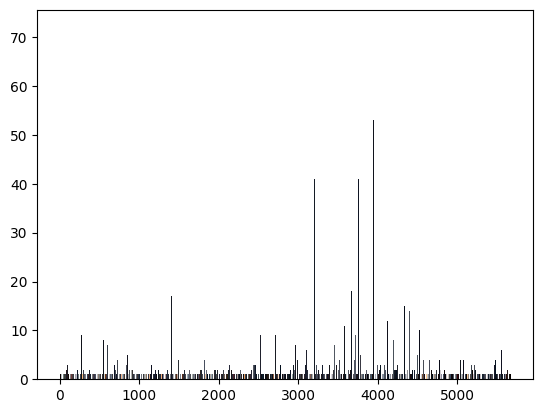

In [ ]:
im = Image.open('/content/drive/MyDrive/final_detection2/runs/detect/track3/crops/solar-panel/solar_panel5.jpg')
w, h = im.size
colors = im.getcolors(w*h)

def hexencode(rgb):
    r=rgb[0]
    g=rgb[1]
    b=rgb[2]
    return '#%02x%02x%02x' % (r,g,b)

for idx, c in enumerate(colors):
    plt.bar(idx, c[0], color=hexencode(c[1]))

plt.show()

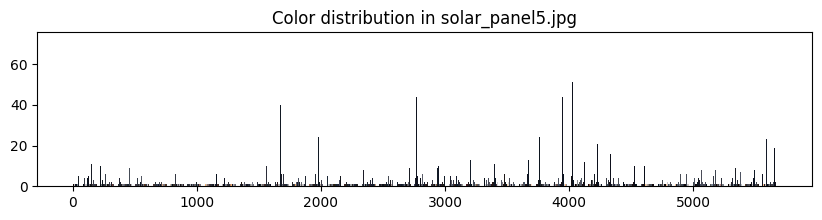

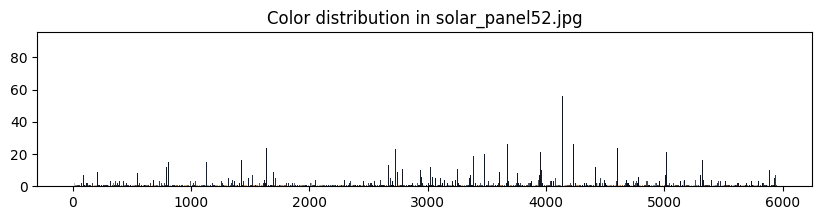

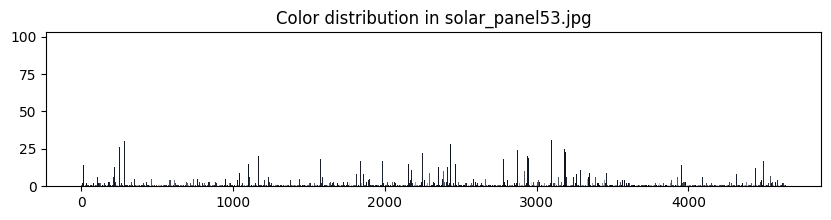

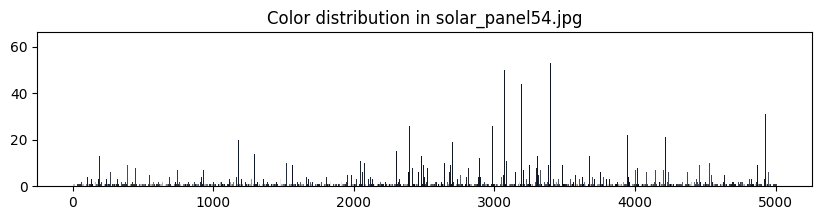

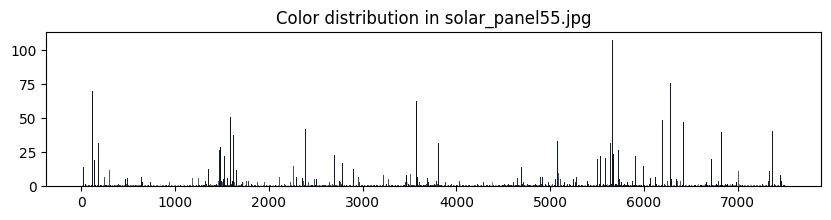

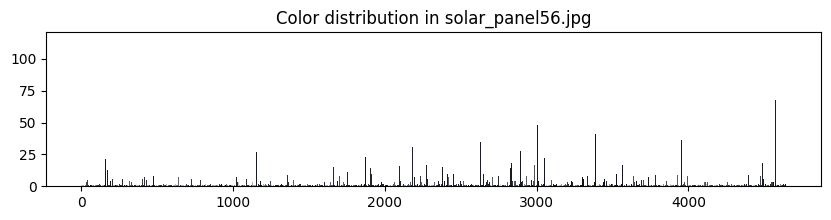

KeyboardInterrupt: 

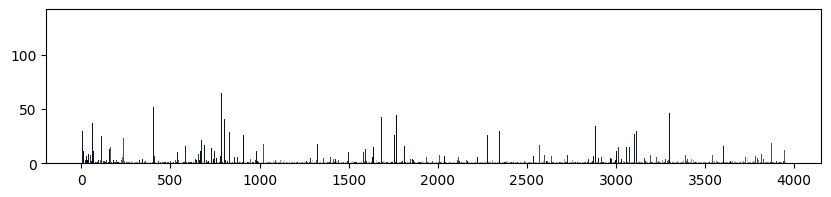

In [ ]:
# Function to convert RGB to hex
def hexencode(rgb):
    r, g, b = rgb
    return '#%02x%02x%02x' % (r, g, b)

# Path to the folder containing the images
folder_path = '/content/drive/MyDrive/final_detection2/runs/detect/track3/crops/solar-panel'

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]

# Process each image
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    im = Image.open(image_path)
    w, h = im.size
    colors = im.getcolors(w * h)

    # Plot the color bar for the current image
    plt.figure(figsize=(10, 2))
    for idx, c in enumerate(colors):
        plt.bar(idx, c[0], color=hexencode(c[1]))

    # Set title for the current image
    plt.title(f'Color distribution in {image_file}')
    plt.show()


In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Path to the folder containing the images
folder_path = '/content/drive/MyDrive/final_detection2/runs/detect/track3/crops/solar-panel'

# Path to save the plots in Google Drive
save_folder_path = '/content/drive/MyDrive/final_detection2/runs/histograms'

# Create the save directory if it doesn't exist
if not os.path.exists(save_folder_path):
    os.makedirs(save_folder_path)

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]

# Function to convert RGB to hex
def hexencode(rgb):
    r, g, b = rgb
    return '#%02x%02x%02x' % (r, g, b)

# Function to process and plot color distributions for a batch of images
def process_color_distribution_batch(batch_files, batch_idx):
    # Determine the layout of subplots (e.g., 5 rows x 10 columns)
    n_cols = 5
    n_rows = 10
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 40))
    axes = axes.flatten()

    for idx, image_file in enumerate(batch_files):
        image_path = os.path.join(folder_path, image_file)
        im = Image.open(image_path)
        w, h = im.size
        colors = im.getcolors(w * h)

        # Plot the color bar for the current image
        ax = axes[idx]
        for i, c in enumerate(colors):
            ax.bar(i, c[0], color=hexencode(c[1]))

        # Set title for the current image
        ax.set_title(image_file)
        ax.axis('off')  # Hide axes for a cleaner look

    # Adjust layout
    plt.tight_layout()
    # Save the figure in the specified folder
    plt.savefig(os.path.join(save_folder_path, f'color_distribution_batch_{batch_idx}.png'))
    plt.close()

# Batch size (number of images to process at once)
batch_size = 50

# Process images in batches
for batch_idx in range(0, len(image_files), batch_size):
    batch_files = image_files[batch_idx:batch_idx + batch_size]
    process_color_distribution_batch(batch_files, batch_idx // batch_size)



In [ ]:
# Path to the directory containing images
image_folder = "/content/drive/MyDrive/final_detection2/runs/detect/track3/crops/solar-panel"

# Initialize the histogram bins
bins = np.zeros(256, np.int32)

# Loop through each image file in the directory
for image_file in os.listdir(image_folder):
    # Construct the full file path
    image_path = os.path.join(image_folder, image_file)

    # Read the image
    img = cv.imread(image_path)

    if img is None:
        print(f"Error: Could not read image {image_file}")
        continue

    # Loop through each pixel in the image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            intensity = 0
            # Sum the RGB values to calculate the intensity
            for k in range(len(img[i][j])):
                intensity += img[i][j][k]

            # Update the corresponding bin
            bins[int(intensity / 3)] += 1

# Print the combined histogram bins
print(bins)



[   7   16   26   54   72  122  158  179  255  263  380  451  578  815 1084 1385 1853 2344 3018 3837 4580 5484 5942 6357 6898 6960 7136 6589 6133 5718 5118 4463 3946 3523 3108 2729 2407 2172 2003 1758 1636 1561 1508 1435 1282 1142 1127 1023 1069  987  984  933  905  919  836  915  893  855  818  877  799  851  863
  844  862  821  839  832  834  849  883  914  978 1033 1114 1096 1179 1142 1200 1182 1195 1262 1201 1126 1129 1204 1127 1112 1073 1004  958  874  830  735  724  645  554  517  449  458  399  371  324  278  285  273  278  233  220  221  212  203  199  199  184  197  180  169  196  200  184  174  182  178  182  164
  197  174  194  190  159  178  201  205  158  162  195  198  178  200  197  222  191  196  203  221  199  206  227  212  217  232  236  238  239  241  212  229  203  228  216  249  265  255  265  263  245  231  253  259  250  234  226  206  218  246  233  224  212  255  221  252  217  239  224  227  221  240  263
  211  252  265  247  219  208  203  194  235  166  

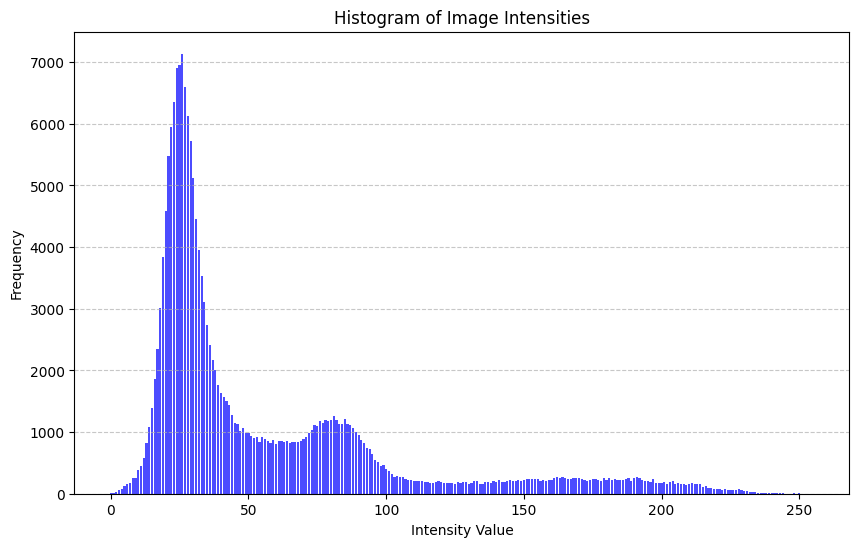

In [ ]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(range(256), bins, color='blue', alpha=0.7)
plt.title('Histogram of Image Intensities')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

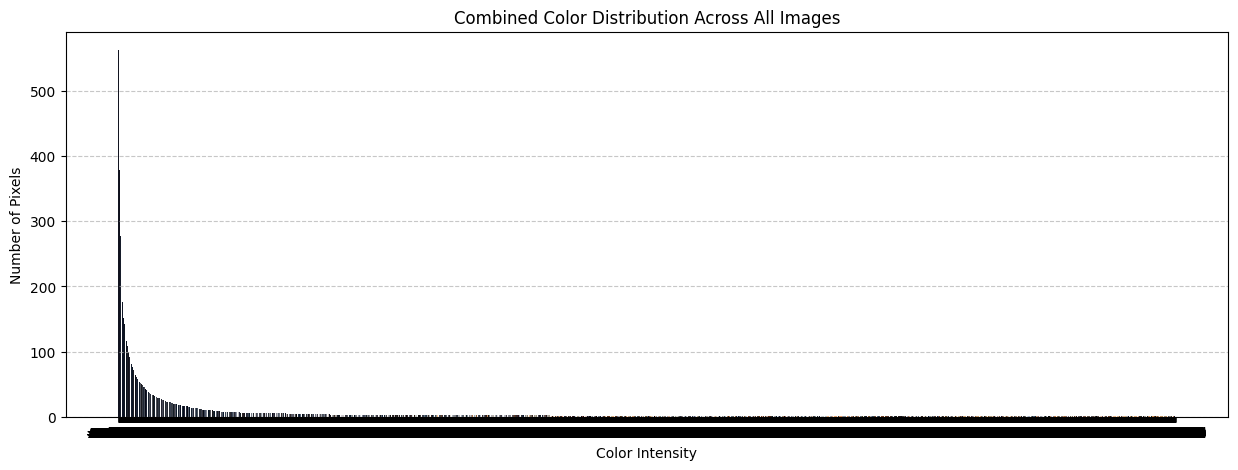

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def hexencode(rgb):
    r, g, b = rgb
    return '#%02x%02x%02x' % (r, g, b)

# Path to the directory containing images
image_folder = "/content/drive/MyDrive/final_detection2/runs/detect/track3/crops/solar-panel"

# Initialize a dictionary to store color counts
color_counts = {}

# Loop through each image file in the directory
for image_file in os.listdir(image_folder):
    # Construct the full file path
    image_path = os.path.join(image_folder, image_file)

    # Open the image
    im = Image.open(image_path)
    w, h = im.size

    # Get colors in the image
    colors = im.getcolors(w * h)

    if colors is None:
        print(f"Error: Could not get colors for image {image_file}")
        continue

    # Update color counts
    for count, color in colors:
        if color in color_counts:
            color_counts[color] += count
        else:
            color_counts[color] = count

# Sort colors by total count
sorted_colors = sorted(color_counts.items(), key=lambda item: item[1], reverse=True)

# Plot the combined color distribution
plt.figure(figsize=(15, 5))
for idx, (color, count) in enumerate(sorted_colors):
    plt.bar(idx, count, color=hexencode(color))

plt.title('Combined Color Distribution Across All Images')
plt.xlabel('Color Intensity')
plt.ylabel('Number of Pixels')
plt.xticks(range(len(sorted_colors)), [hexencode(color) for color, _ in sorted_colors])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
